# Data Preprocessing

### Data Cleaning
- Handling Duplicates

- Handling Outliers

- Hanlding Missing Values

- Data Standardizing

# Data Cleaning

### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize

### Reading the Dataset

In [3]:
df=pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\Sports dataset.csv")
column_names = df.columns.tolist()
# Printing the column names
print("Column Names:")
print(column_names)

Column Names:
['Unnamed: 0', 'Player', 'Team', 'Age', 'Height', 'Weight', 'Position', 'Goals', 'Assists', 'YellowCards', 'RedCards', 'PassCompletionRate', 'DistanceCovered', 'Sprints', 'ShotsOnTarget', 'TacklesWon', 'CleanSheets', 'PlayerFatigue', 'MatchPressure', 'InjuryHistory', 'TrainingHours', 'FatigueInjuryCorrelation', 'PressurePerformanceImpact', 'EffectiveTraining', 'Season']


# Handling duplicates

In [4]:
df_no_duplicates=df.drop_duplicates(keep="first")
print("\nDataFrame after removing exact duplicates:")
print(df_no_duplicates.head())
df_no_duplicates = df_no_duplicates.rename(columns={'Unnamed: 0': 'Played_Id'})
df_no_duplicates.to_csv("new_dataset.csv",index=False)


DataFrame after removing exact duplicates:
   Unnamed: 0    Player    Team  Age      Height     Weight  Position  Goals  \
0           0  Player C  Team C   31  164.238236  64.899554  Defender   11.0   
1           1  Player D  Team C   22  164.489643  55.636159  Defender    2.0   
2           2  Player A  Team C   27  343.297866  89.325850  Defender    NaN   
3           3  Player C  Team C   29  184.567349  50.952308   Forward   13.0   
4           4  Player C  Team C   27  192.172813  78.832881  Defender    6.0   

   Assists  YellowCards  ...  TacklesWon  CleanSheets  PlayerFatigue  \
0      2.0            4  ...          22            6       0.374540   
1     16.0            8  ...          27            6       0.950714   
2     13.0            8  ...          23            5       0.731994   
3      1.0            3  ...           3            4       0.598658   
4      8.0            1  ...          12            8       0.156019   

   MatchPressure  InjuryHistory  TrainingH

In [5]:
df=pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv")

# Handling Outliers

### Z-score Analysis

In [6]:
# Columns to exclude since categorical
exclude_columns = ['Player_Id', 'Team', 'Player', 'Position']

# Z-score function
def detect_outliers(df, exclude_columns):
    outliers = pd.DataFrame()
    for col in df.columns:
        if col not in exclude_columns:
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            outliers[col] = z_scores > 3  # Z-score threshold for outliers
    return outliers
outliers_df = detect_outliers(df, exclude_columns)

columns_with_outliers = outliers_df.columns[outliers_df.any()].tolist() # names of columns containing outliers
print("\nColumns with Outliers:")
print(columns_with_outliers)



Columns with Outliers:
['Height', 'Weight', 'Goals', 'FatigueInjuryCorrelation', 'PressurePerformanceImpact', 'EffectiveTraining']


In [7]:
# Understand goals column
print(df['Goals'].describe())
print(df['Goals'].unique())

count    12689.000000
mean        38.279770
std        113.887702
min          0.000000
25%          8.000000
50%         17.000000
75%         26.000000
max       2900.000000
Name: Goals, dtype: float64
[1.1e+01 2.0e+00     nan 1.3e+01 6.0e+00 2.6e+01 2.7e+01 1.0e+01 0.0e+00
 2.2e+01 1.2e+01 2.8e+02 2.3e+01 1.6e+01 1.8e+02 1.9e+01 2.1e+01 2.5e+01
 9.0e+00 1.4e+01 5.0e+01 2.9e+01 2.0e+01 1.8e+01 3.0e+00 4.0e+00 2.4e+01
 1.5e+01 2.4e+02 1.4e+02 6.0e+01 8.0e+00 5.0e+00 8.0e+01 4.0e+01 2.8e+01
 1.0e+00 7.0e+00 2.1e+02 1.7e+01 2.9e+02 1.6e+03 2.0e+02 1.3e+02 1.5e+03
 1.0e+02 2.2e+02 1.1e+02 2.5e+02 2.3e+02 2.7e+03 1.2e+02 9.0e+01 1.5e+02
 2.6e+02 1.9e+02 1.6e+02 7.0e+01 1.7e+02 9.0e+02 3.0e+01 2.9e+03 2.7e+02
 3.0e+02 1.2e+03 2.3e+03 7.0e+02 1.9e+03 5.0e+02 2.4e+03 1.8e+03 2.5e+03
 1.0e+03 1.4e+03 1.1e+03 4.0e+02]


In [8]:
# Calculate IQR
Q1 = df['Goals'].quantile(0.25)
Q3 = df['Goals'].quantile(0.75)
IQR = Q3 - Q1

# Upper and lower bounds setting
threshold_multiplier = 1.3 # a threshold of 1.3 times the IQR
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

# Winsorize the "Goals" column
df['Goals_winsorized'] = df['Goals'].clip(lower=lower_bound, upper=upper_bound)

# Checking the stats
print(df['Goals_winsorized'].describe())
df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv")

count    12689.000000
mean        19.114241
std         14.081257
min          0.000000
25%          8.000000
50%         17.000000
75%         26.000000
max         49.400000
Name: Goals_winsorized, dtype: float64


In [415]:
# Check for skewness and kurtosis
print("\nSkewness of original column:", df['Goals'].skew())
print("Kurtosis of original column:", df['Goals'].kurt())

print("\nSkewness of winsorized column:", df['Goals_winsorized'].skew())
print("Kurtosis of winsorized column:", df['Goals_winsorized'].kurt())


Skewness of original column: 14.900945418092158
Kurtosis of original column: 302.0035809803011

Skewness of winsorized column: 0.9064766186220881
Kurtosis of winsorized column: 0.10406604506212958


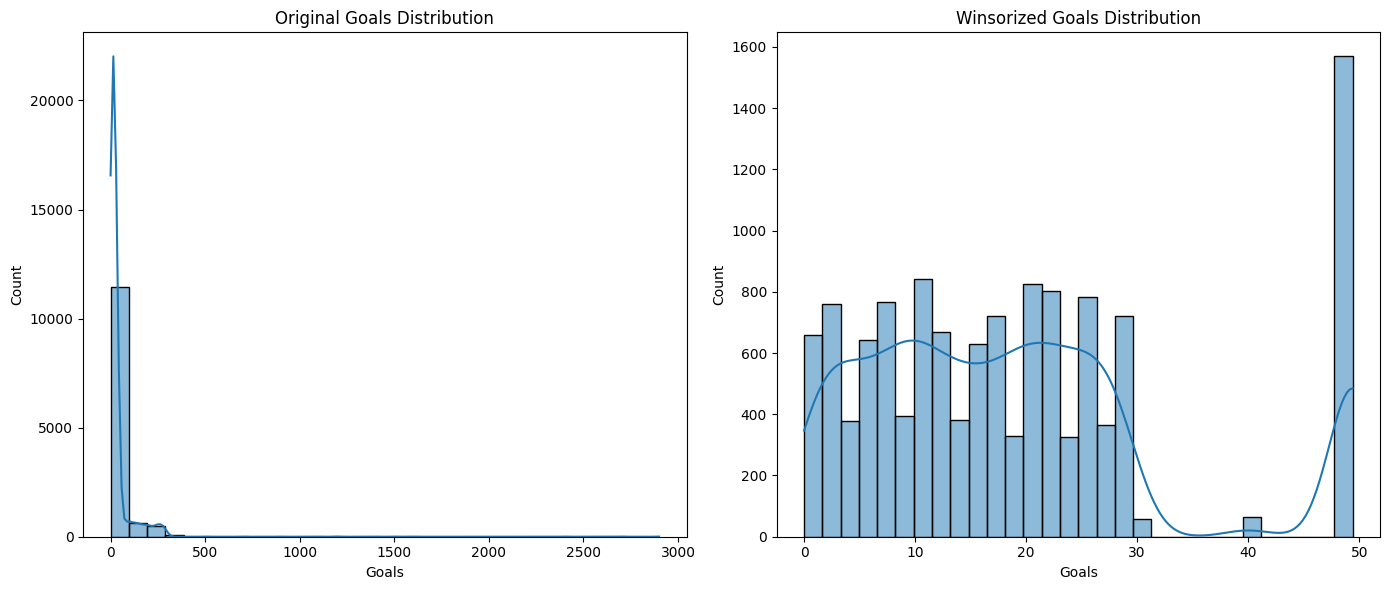

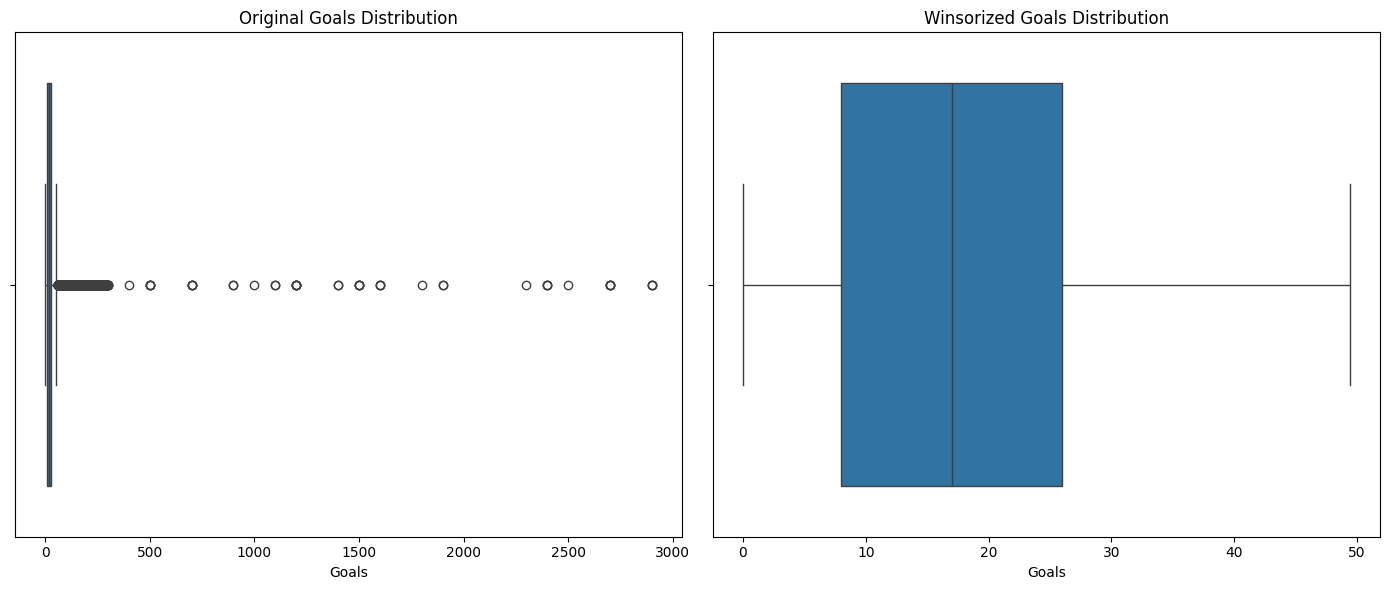

In [9]:
# Plotting histograms to show the difference before and after winsorization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Goals'], bins=30, kde=True)
plt.title('Original Goals Distribution')
plt.xlabel('Goals')

plt.subplot(1, 2, 2)
sns.histplot(df['Goals_winsorized'], bins=30, kde=True)
plt.title('Winsorized Goals Distribution')
plt.xlabel('Goals')

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Goals'])
plt.title('Original Goals Distribution')
plt.xlabel('Goals')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Goals_winsorized'])
plt.title('Winsorized Goals Distribution')
plt.xlabel('Goals')

plt.tight_layout()
plt.show()

In [10]:
# Inspect the goals column
print(df['Height'].describe())
print(df['Height'].unique())

count    12764.000000
mean       188.478929
std         40.043021
min        160.009635
25%        170.345609
50%        180.850710
75%        191.662956
max        399.815697
Name: Height, dtype: float64
[164.2382365 164.4896429 343.2978655 ... 185.1052142 183.2087585
 180.030211 ]


#### Height Column Winsorization

In [13]:

Q1_height = df['Height'].quantile(0.25)
Q3_height = df['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# upper and lower bounds 
threshold_multiplier = 1.4  
lower_bound_height = Q1_height - threshold_multiplier * IQR_height
upper_bound_height = Q3_height + threshold_multiplier * IQR_height

# Winsorize 
df['Height_winsorized'] = df['Height'].clip(lower=lower_bound_height, upper=upper_bound_height)

#  summary stats
print(df['Height_winsorized'].describe())
df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv")


count    12764.000000
mean       181.961123
std         14.373816
min        160.009635
25%        170.345609
50%        180.850710
75%        191.662956
max        221.507242
Name: Height_winsorized, dtype: float64


In [12]:
# Check for skewness and kurtosis
print("\nSkewness of original column:", df['Height'].skew())
print("Kurtosis of original column:", df['Height'].kurt())

print("\nSkewness of winsorized column:", df['Height_winsorized'].skew())
print("Kurtosis of winsorized column:", df['Height_winsorized'].kurt())


Skewness of original column: 3.821635829329091
Kurtosis of original column: 14.519287319128697

Skewness of winsorized column: 0.7352045191913632
Kurtosis of winsorized column: 0.5129509088035351


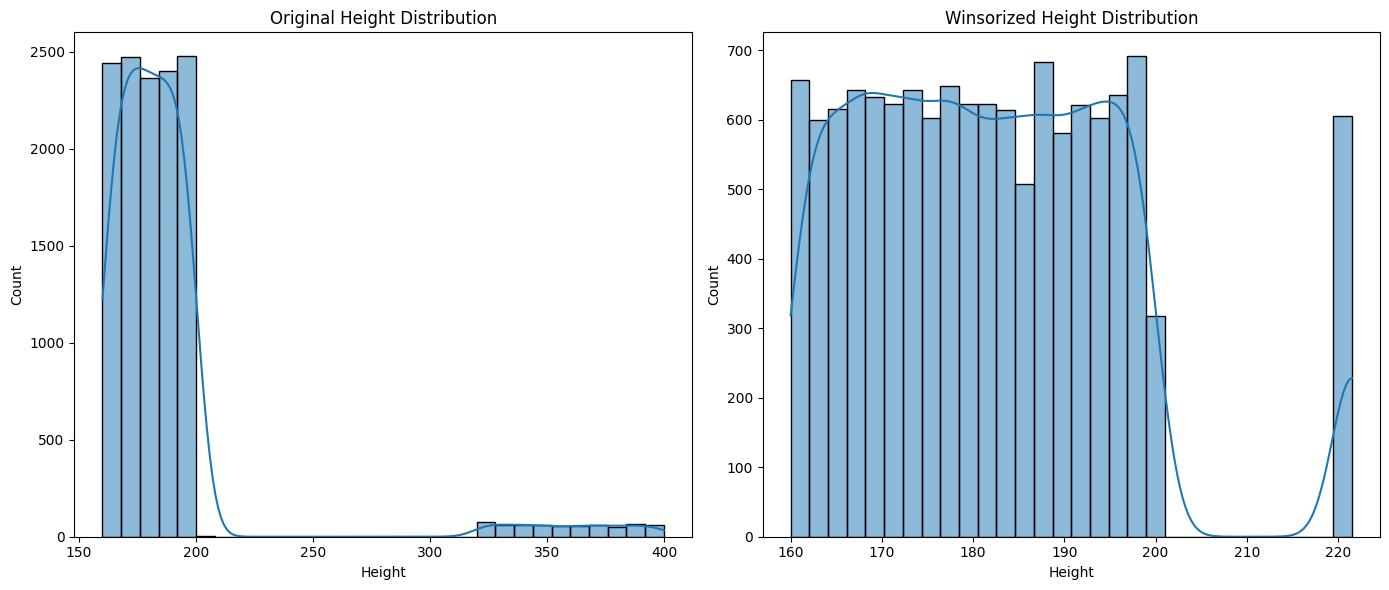

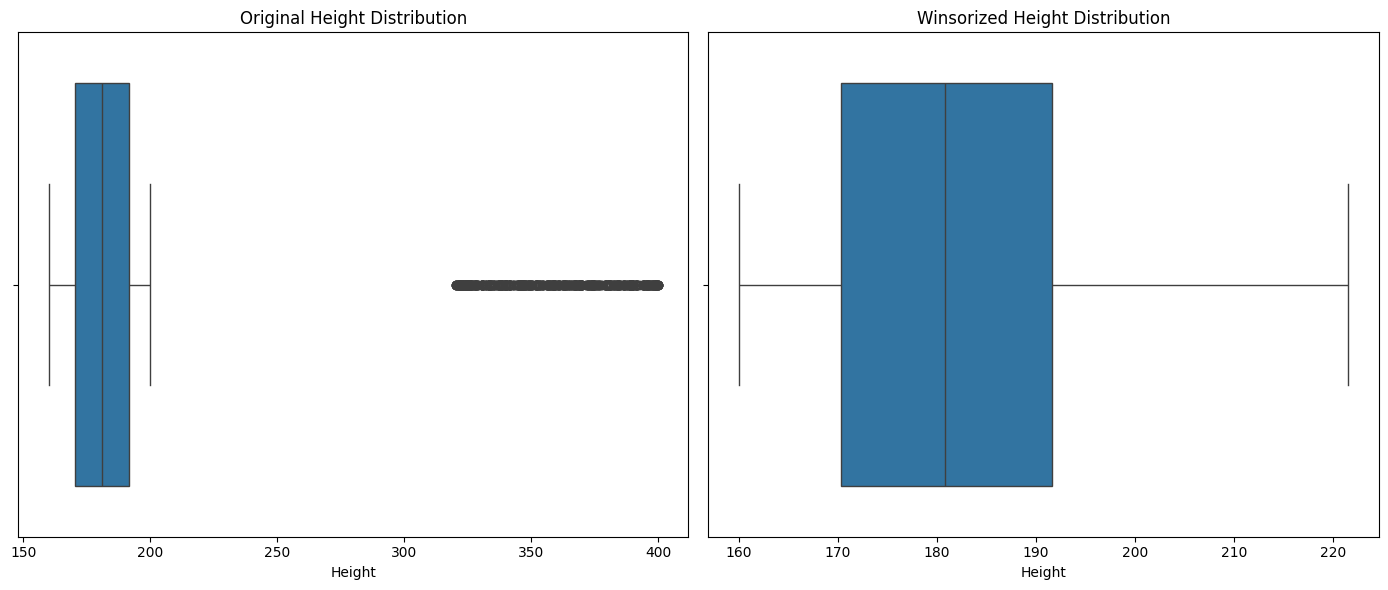

In [14]:
plt.figure(figsize=(14, 6))

# Plot histogram before and after Winsorization
plt.subplot(1, 2, 1)
sns.histplot(df['Height'], bins=30, kde=True)
plt.title('Original Height Distribution')
plt.xlabel('Height')

# Plot histogram for winsorized Weight
plt.subplot(1, 2, 2)
sns.histplot(df['Height_winsorized'], bins=30, kde=True)
plt.title('Winsorized Height Distribution')
plt.xlabel('Height')

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Height'])
plt.title('Original Height Distribution')
plt.xlabel('Height')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Height_winsorized'])
plt.title('Winsorized Height Distribution')
plt.xlabel('Height')

plt.tight_layout()
plt.show()


### Weight Winsorization

In [421]:
# Inspect the goals column
print(df['Weight'].describe())
print(df['Weight'].unique())

count    12678.000000
mean        89.593964
std         28.095578
min         50.017672
25%         69.405751
50%         87.435081
75%        104.791500
max        239.972720
Name: Weight, dtype: float64
[ 64.89955397  55.6361591   89.32584969 ... 108.25840202 202.74974131
  51.4189144 ]


In [15]:
# IQR for the 'Weight' column
Q1_weight = df['Weight'].quantile(0.25)
Q3_weight = df['Weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# upper and lower bounds
threshold_multiplier = 1.4 
lower_bound_weight = Q1_weight - threshold_multiplier * IQR_weight
upper_bound_weight = Q3_weight + threshold_multiplier * IQR_weight
df['Weight_winsorized'] = df['Weight'].clip(lower=lower_bound_weight, upper=upper_bound_weight)

#summary stats
print(df['Weight_winsorized'].describe())


count    12678.000000
mean        88.327258
std         23.415333
min         50.017672
25%         69.405751
50%         87.435081
75%        104.791500
max        154.331549
Name: Weight_winsorized, dtype: float64


In [16]:
# Checking for skewness and kurtosis
print("\nSkewness of original column:", df['Weight'].skew())
print("Kurtosis of original column:", df['Weight'].kurt())

print("\nSkewness of winsorized column:", df['Weight_winsorized'].skew())
print("Kurtosis of winsorized column:", df['Weight_winsorized'].kurt())


Skewness of original column: 1.8113598048703479
Kurtosis of original column: 6.406883898909744

Skewness of winsorized column: 0.5164735284503101
Kurtosis of winsorized column: 0.17634725600496948


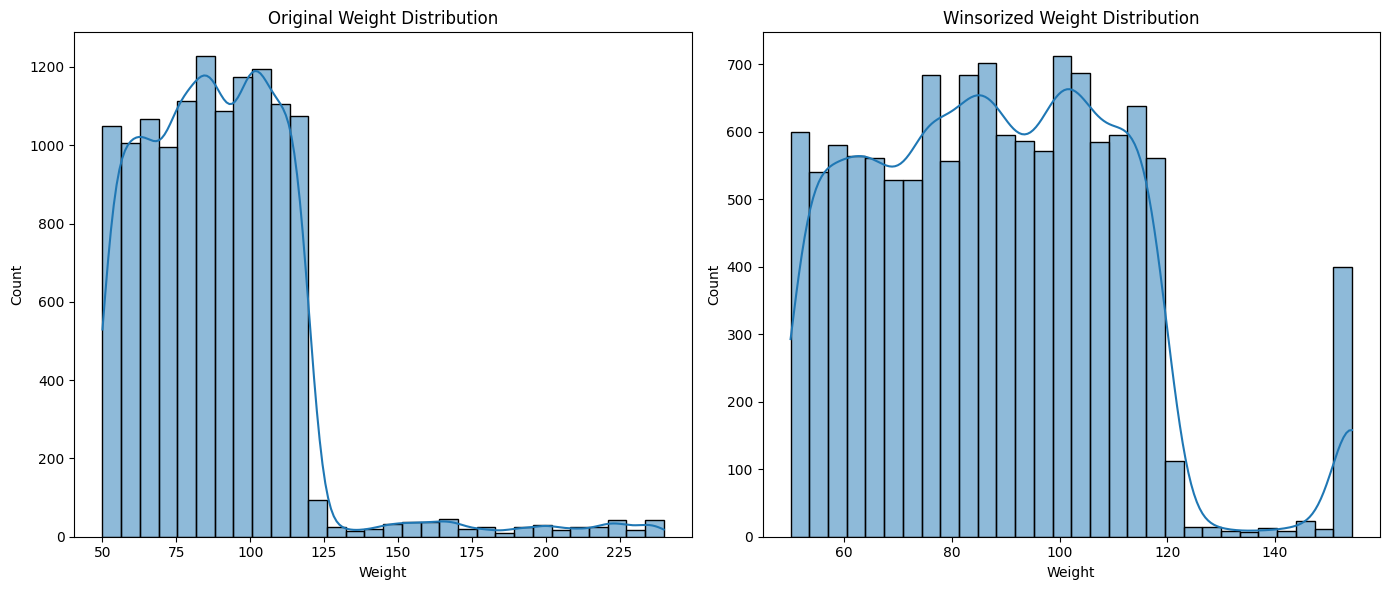

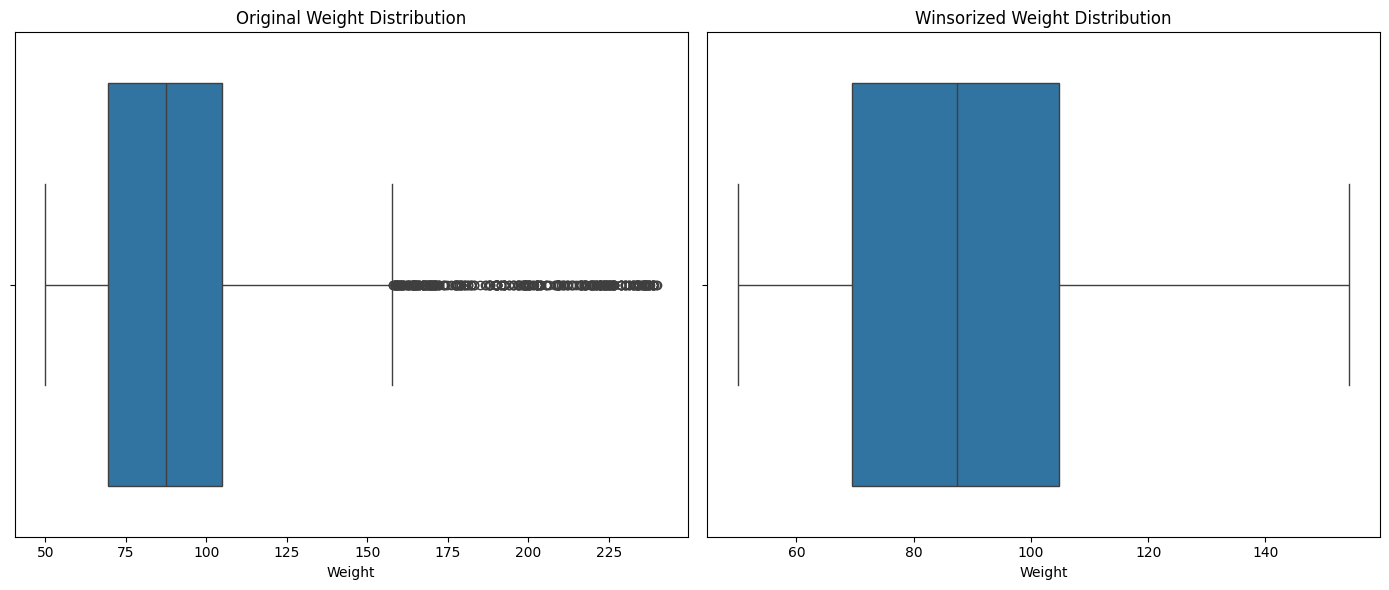

In [17]:
plt.figure(figsize=(14, 6))

# Plot histogram for Weight
plt.subplot(1, 2, 1)
sns.histplot(df['Weight'], bins=30, kde=True)
plt.title('Original Weight Distribution')
plt.xlabel('Weight')

# Plot histogram for winsorized Weight
plt.subplot(1, 2, 2)
sns.histplot(df['Weight_winsorized'], bins=30, kde=True)
plt.title('Winsorized Weight Distribution')
plt.xlabel('Weight')

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Weight'])
plt.title('Original Weight Distribution')
plt.xlabel('Weight')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Weight_winsorized'])
plt.title('Winsorized Weight Distribution')
plt.xlabel('Weight')

plt.tight_layout()
plt.show()


### FatigueInjuryCorrelation Winsorization

In [425]:
# Inspect the goals column
print(df['FatigueInjuryCorrelation'].describe())
print(df['FatigueInjuryCorrelation'].unique())

count    16628.000000
mean         2.246545
std          2.102411
min          0.000000
25%          0.531720
50%          1.659992
75%          3.460363
max          8.927937
Name: FatigueInjuryCorrelation, dtype: float64
[1.86490201 0.22285732 0.         ... 1.31977377 2.79741759 1.83634482]


In [18]:
# C IQR for the 'FatigueInjuryCorrelation' 
Q1_fatigue = df['FatigueInjuryCorrelation'].quantile(0.25)
Q3_fatigue = df['FatigueInjuryCorrelation'].quantile(0.75)
IQR_fatigue = Q3_fatigue - Q1_fatigue

#upper and lower bounds 
threshold_multiplier = 1.5 
lower_bound_fatigue = Q1_fatigue - threshold_multiplier * IQR_fatigue
upper_bound_fatigue = Q3_fatigue + threshold_multiplier * IQR_fatigue
df['FatigueInjuryCorrelation_winsorized'] = df['FatigueInjuryCorrelation'].clip(lower=lower_bound_fatigue, upper=upper_bound_fatigue)

#  summary stats
print(df['FatigueInjuryCorrelation_winsorized'].describe())


count    16628.000000
mean         2.239917
std          2.083507
min          0.000000
25%          0.531720
50%          1.659992
75%          3.460363
max          7.853327
Name: FatigueInjuryCorrelation_winsorized, dtype: float64


In [19]:
# Check for skewness and kurtosis
print("\nSkewness of original column:", df['FatigueInjuryCorrelation'].skew())
print("Kurtosis of original column:", df['FatigueInjuryCorrelation'].kurt())

print("\nSkewness of winsorized column:", df['FatigueInjuryCorrelation_winsorized'].skew())
print("Kurtosis of winsorized column:", df['FatigueInjuryCorrelation_winsorized'].kurt())


Skewness of original column: 1.0020633498481957
Kurtosis of original column: 0.18698453988524522

Skewness of winsorized column: 0.9607303398294214
Kurtosis of winsorized column: 0.0159117382143088


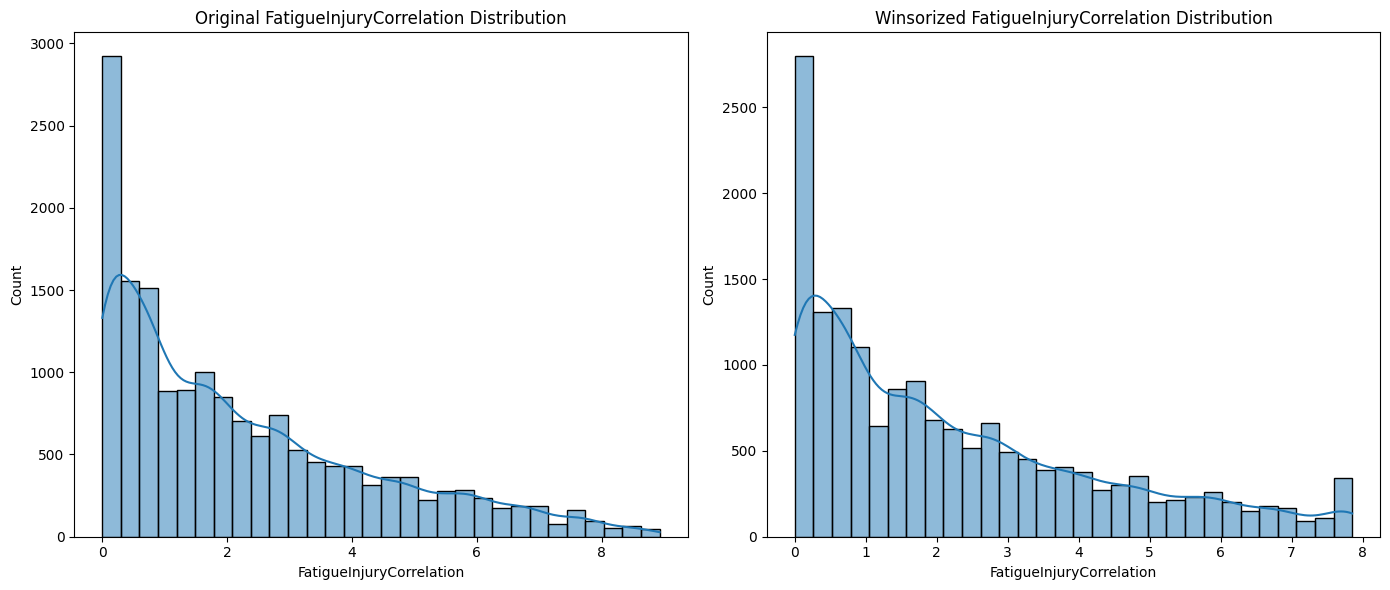

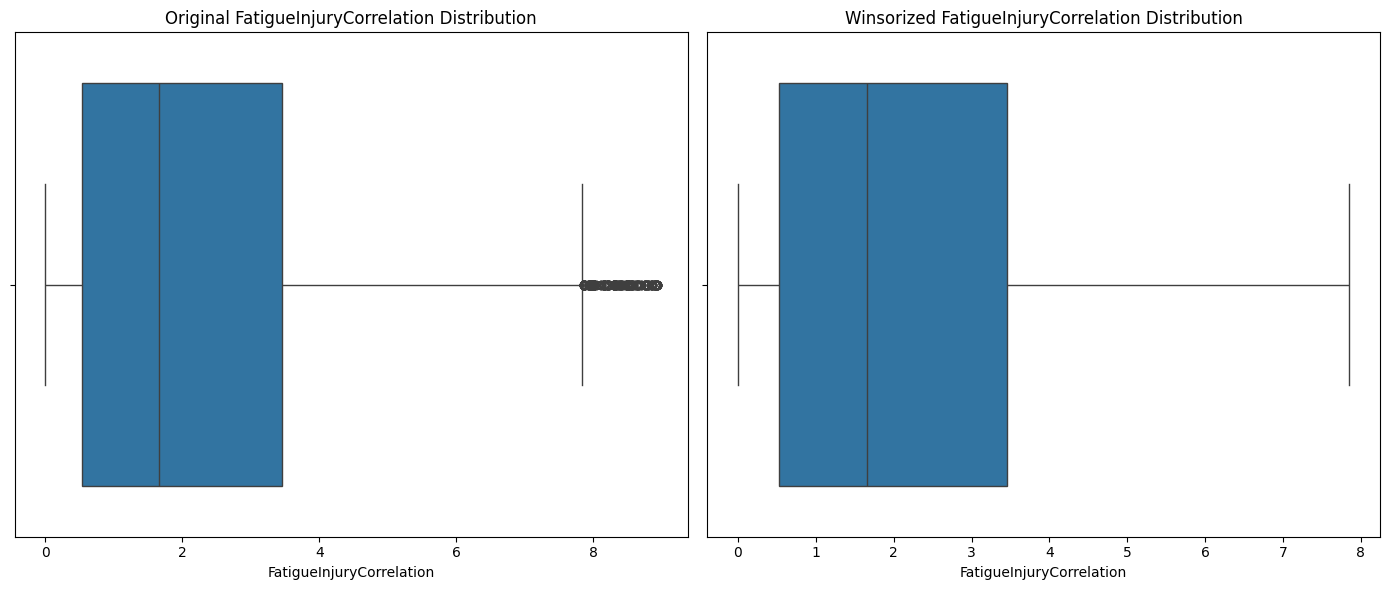

In [428]:
plt.figure(figsize=(14, 6))

# Plot histogram for FatigueInjuryCorrelation before and after winsozation
plt.subplot(1, 2, 1)
sns.histplot(df['FatigueInjuryCorrelation'], bins=30, kde=True)
plt.title('Original FatigueInjuryCorrelation Distribution')
plt.xlabel('FatigueInjuryCorrelation')

plt.subplot(1, 2, 2)
sns.histplot(df['FatigueInjuryCorrelation_winsorized'], bins=30, kde=True)
plt.title('Winsorized FatigueInjuryCorrelation Distribution')
plt.xlabel('FatigueInjuryCorrelation')

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['FatigueInjuryCorrelation'])
plt.title('Original FatigueInjuryCorrelation Distribution')
plt.xlabel('FatigueInjuryCorrelation')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['FatigueInjuryCorrelation_winsorized'])
plt.title('Winsorized FatigueInjuryCorrelation Distribution')
plt.xlabel('FatigueInjuryCorrelation')

plt.tight_layout()
plt.show()


### PressurePerformanceImpact Winsorization

In [20]:
print(df['PressurePerformanceImpact'].describe())
print(df['PressurePerformanceImpact'].unique())

count    14917.000000
mean         6.070969
std         10.492066
min          0.007380
25%          1.392857
50%          3.000000
75%          5.833333
max         99.000000
Name: PressurePerformanceImpact, dtype: float64
[ 1.41666667  6.66666667  8.         ...  4.84210526  3.53333333
 10.83333333]


In [24]:
# Calculating IQR for the 'PressurePerformanceImpact' 
Q1_pressure = df['PressurePerformanceImpact'].quantile(0.25)
Q3_pressure = df['PressurePerformanceImpact'].quantile(0.75)
IQR_pressure = Q3_pressure - Q1_pressure

threshold_multiplier = 1.5 
lower_bound_pressure = Q1_pressure - threshold_multiplier * IQR_pressure
upper_bound_pressure = Q3_pressure + threshold_multiplier * IQR_pressure
df['PressurePerformanceImpact_winsorized'] = df['PressurePerformanceImpact'].clip(lower=lower_bound_pressure, upper=upper_bound_pressure)

# summary stats
print(df['PressurePerformanceImpact_winsorized'].describe())


count    14917.000000
mean         4.291379
std          3.857581
min          0.007380
25%          1.392857
50%          3.000000
75%          5.833333
max         12.494048
Name: PressurePerformanceImpact_winsorized, dtype: float64


In [25]:
# Check for skewness and kurtosis
print("\nSkewness of original column:", df['PressurePerformanceImpact'].skew())
print("Kurtosis of original column:", df['PressurePerformanceImpact'].kurt())

print("\nSkewness of winsorized column:", df['PressurePerformanceImpact_winsorized'].skew())
print("Kurtosis of winsorized column:", df['PressurePerformanceImpact_winsorized'].kurt())


Skewness of original column: 4.6516786271709
Kurtosis of original column: 27.265877939833487

Skewness of winsorized column: 1.0739227195669063
Kurtosis of winsorized column: -0.05542721792678673


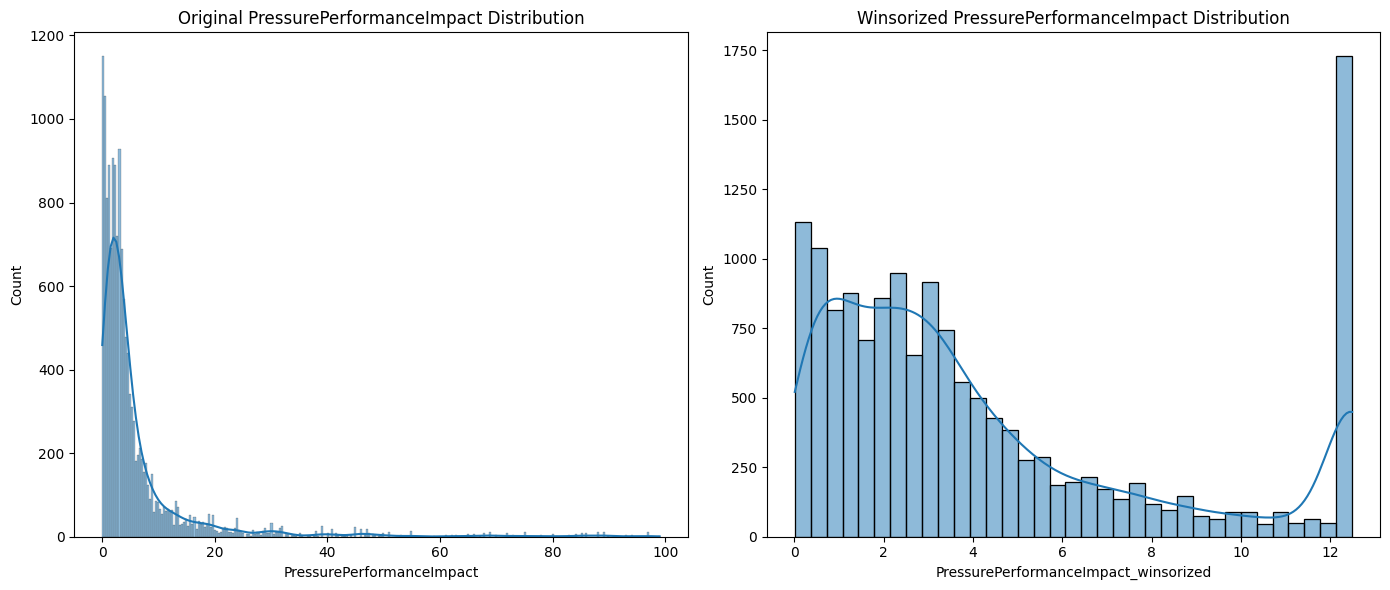

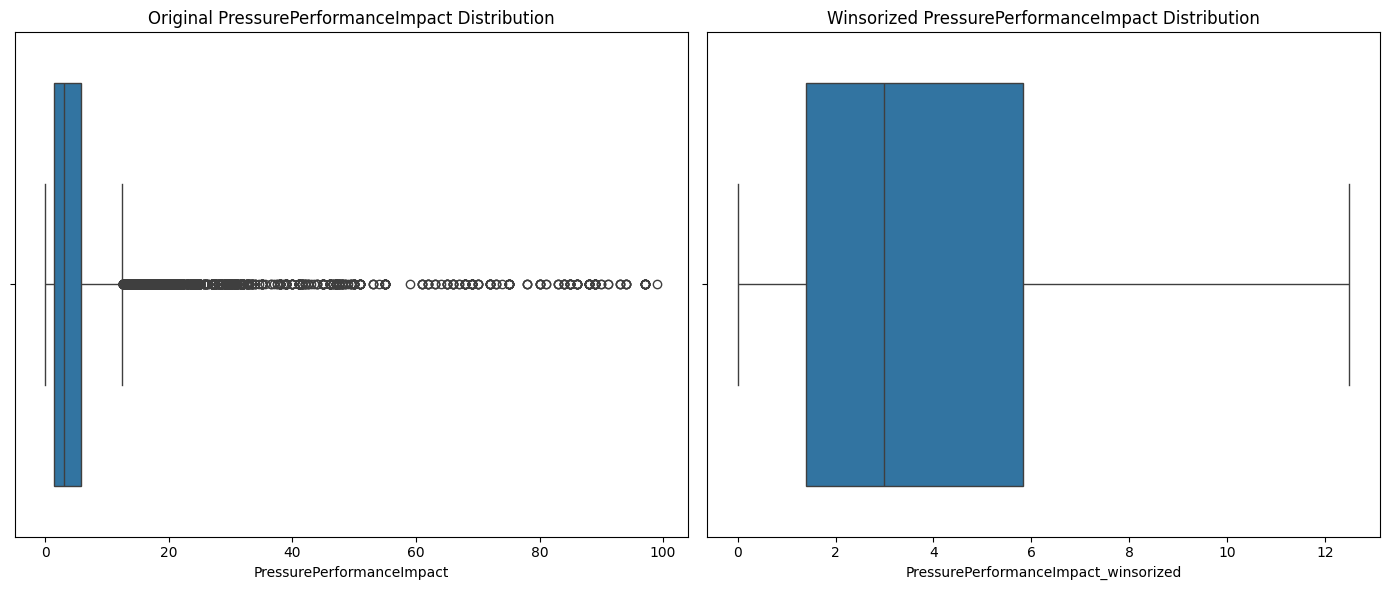

In [26]:
# PLotting histograms before and after Winsorization
plt.figure(figsize=(14, 6))

# Histograms
plt.subplot(1, 2, 1)
sns.histplot(df['PressurePerformanceImpact'], kde=True)
plt.title('Original PressurePerformanceImpact Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['PressurePerformanceImpact_winsorized'], kde=True)
plt.title('Winsorized PressurePerformanceImpact Distribution')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['PressurePerformanceImpact'])
plt.title('Original PressurePerformanceImpact Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['PressurePerformanceImpact_winsorized'])
plt.title('Winsorized PressurePerformanceImpact Distribution')

plt.tight_layout()
plt.show()


### EffectiveTraining Winsorization

In [27]:
print(df['EffectiveTraining'].describe())
print(df['EffectiveTraining'].unique())

count    13400.000000
mean       380.134961
std        478.098740
min          0.000000
25%        170.446082
50%        280.583096
75%        437.166937
max       5589.954164
Name: EffectiveTraining, dtype: float64
[247.0747629 216.0660446 359.936777  ... 207.8442077 416.6722417
 597.1704364]


In [28]:
# Calculating IQR for this column
Q1_training = df['EffectiveTraining'].quantile(0.25)
Q3_training = df['EffectiveTraining'].quantile(0.75)
IQR_training = Q3_training - Q1_training

threshold_multiplier = 1.5 
lower_bound_training = Q1_training - threshold_multiplier * IQR_training
upper_bound_training = Q3_training + threshold_multiplier * IQR_training

df['EffectiveTraining_winsorized'] = df['EffectiveTraining'].clip(lower=lower_bound_training, upper=upper_bound_training)

# summary stats
print(df['EffectiveTraining_winsorized'].describe())

count    13400.000000
mean       324.478581
std        201.294438
min          0.000000
25%        170.446082
50%        280.583096
75%        437.166937
max        837.248219
Name: EffectiveTraining_winsorized, dtype: float64


In [29]:
# Check for skewness and kurtosis
print("\nSkewness of original column:", df['EffectiveTraining'].skew())
print("Kurtosis of original column:", df['EffectiveTraining'].kurt())

print("\nSkewness of winsorized column:", df['EffectiveTraining_winsorized'].skew())
print("Kurtosis of winsorized column:", df['EffectiveTraining_winsorized'].kurt())


Skewness of original column: 5.750237198474732
Kurtosis of original column: 42.23337893499998

Skewness of winsorized column: 0.8510235594942426
Kurtosis of winsorized column: 0.12902121727319837


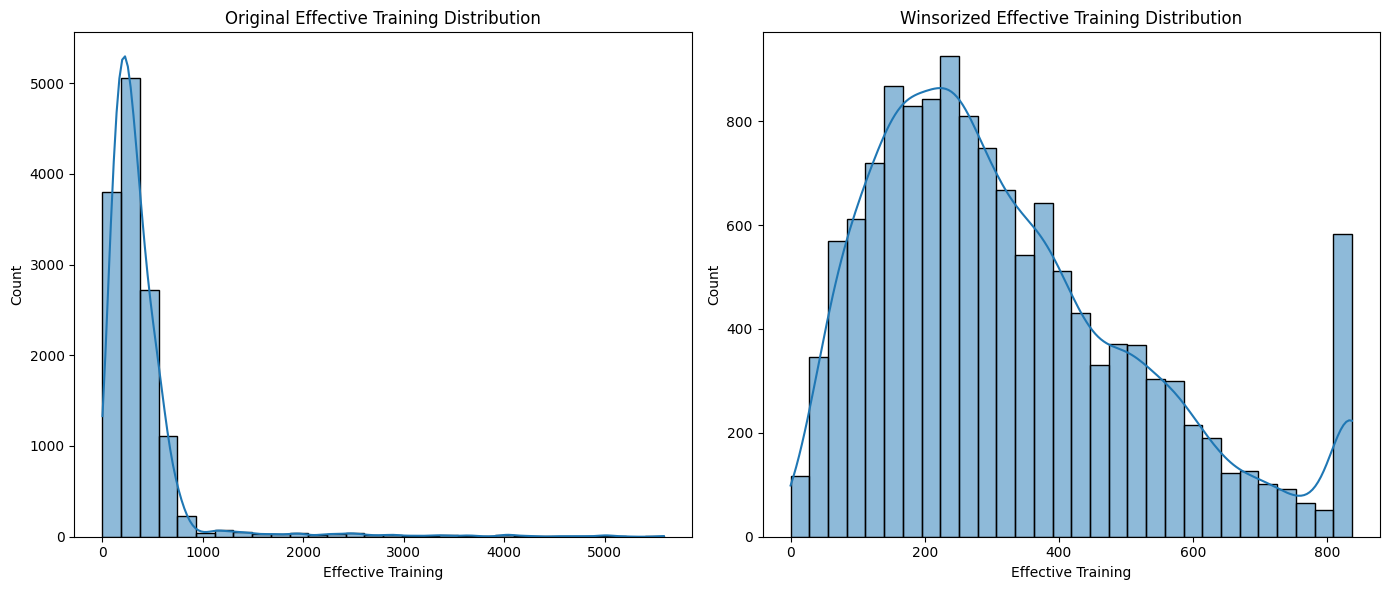

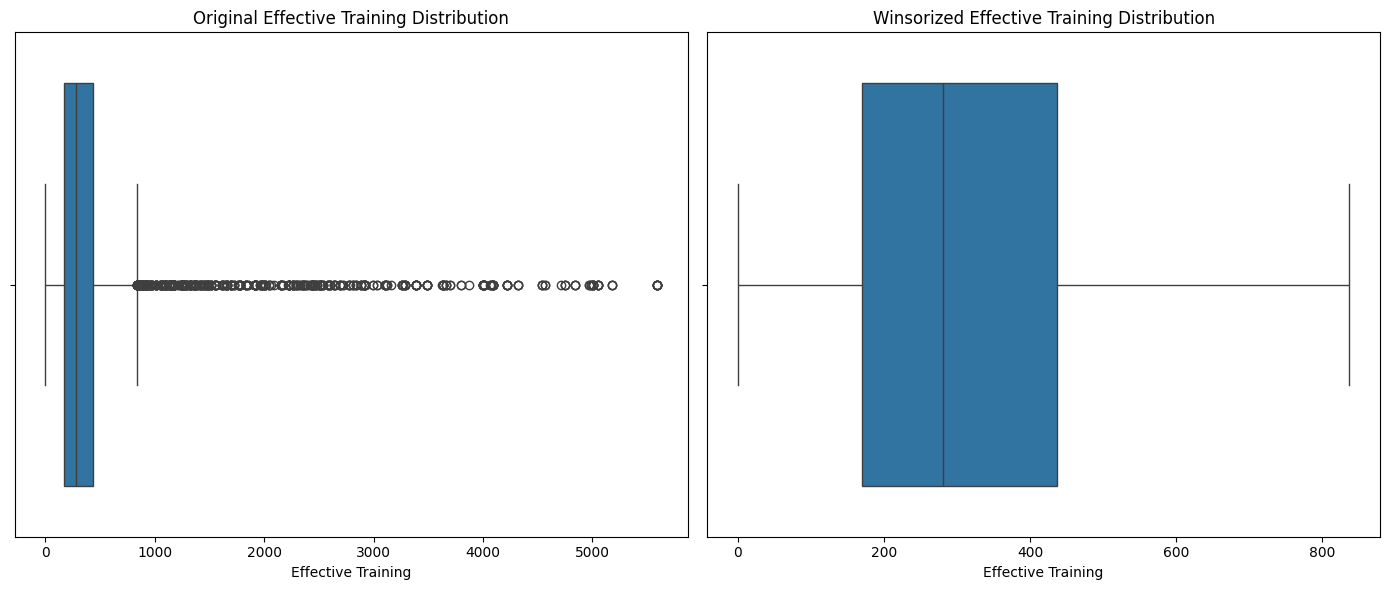

In [30]:
plt.figure(figsize=(14, 6))

# Plot histograms
plt.subplot(1, 2, 1)
sns.histplot(df['EffectiveTraining'], bins=30, kde=True)
plt.title('Original Effective Training Distribution')
plt.xlabel('Effective Training')

plt.subplot(1, 2, 2)
sns.histplot(df['EffectiveTraining_winsorized'], bins=30, kde=True)
plt.title('Winsorized Effective Training Distribution')
plt.xlabel('Effective Training')

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['EffectiveTraining'])
plt.title('Original Effective Training Distribution')
plt.xlabel('Effective Training')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['EffectiveTraining_winsorized'])
plt.title('Winsorized Effective Training Distribution')
plt.xlabel('Effective Training')

plt.tight_layout()
plt.show()


### Again checking for Outliers using z-score

In [31]:
# Columns to exclude
exclude_columns = ['Player_Id', 'Team', 'Player', 'Position','Goals','Height','FatigueInjuryCorrelation','Weight','PressurePerformanceImpact','EffectiveTraining']

# Z-score
def detect_outliers(df, exclude_columns):
    outliers = pd.DataFrame()
    for col in df.columns:
        if col not in exclude_columns:
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            outliers[col] = z_scores > 3  
    return outliers
outliers_df = detect_outliers(df, exclude_columns)

# names of columns with outliers
columns_with_outliers = outliers_df.columns[outliers_df.any()].tolist()
print("\nColumns with Outliers:")
print(columns_with_outliers)


Columns with Outliers:
[]


### Removing Multiple Columns

In [32]:
columns_to_drop = ['Goals', 'Height', 'Weight','FatigueInjuryCorrelation', 'PressurePerformanceImpact', 'EffectiveTraining']
df.drop(columns=columns_to_drop, inplace=True)

In [33]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['Played_Id', 'Player', 'Team', 'Age', 'Position', 'Assists', 'YellowCards', 'RedCards', 'PassCompletionRate', 'DistanceCovered', 'Sprints', 'ShotsOnTarget', 'TacklesWon', 'CleanSheets', 'PlayerFatigue', 'MatchPressure', 'InjuryHistory', 'TrainingHours', 'Season', 'Goals_winsorized', 'Height_winsorized', 'Weight_winsorized', 'FatigueInjuryCorrelation_winsorized', 'PressurePerformanceImpact_winsorized', 'EffectiveTraining_winsorized']


In [34]:
df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv",index=False)

# Handling Missing Values

In [36]:
# Before Imputation
print("Original DataFrame with Missing Values:")
# print(df.head())

# Columns to impute
columns_to_impute = ['Height_winsorized', 'Weight_winsorized', 'Goals_winsorized', 'Assists', 'PassCompletionRate', 'PressurePerformanceImpact_winsorized', 'EffectiveTraining_winsorized']

# Using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df = df.copy()
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

df['Goals_winsorized'] = df['Goals_winsorized'].round()
df['Assists'] = df['Assists'].round()

# Display the DataFrame after KNN imputation
print("\nDataFrame after KNN Imputation:")
print(df)

df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv",index=False)

Original DataFrame with Missing Values:



DataFrame after KNN Imputation:
       Played_Id    Player    Team  Age    Position  Assists  YellowCards  \
0              0  Player C  Team C   31    Defender      2.0            4   
1              1  Player D  Team C   22    Defender     16.0            8   
2              2  Player A  Team C   27    Defender     13.0            8   
3              3  Player C  Team C   29     Forward      1.0            3   
4              4  Player C  Team C   27    Defender      8.0            1   
...          ...       ...     ...  ...         ...      ...          ...   
16623       3190  Player B  Team B   27  Goalkeeper      8.0            0   
16624       3403  Player D  Team B   22  Goalkeeper      9.0            2   
16625       2464  Player A  Team C   34     Forward     14.0            1   
16626       3008  Player D  Team B   19    Defender     10.0            5   
16627       1014  Player A  Team A   26  Goalkeeper      7.0            1   

       RedCards  PassCompletionRate  Dista

In [37]:
total_missing_values = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

Total missing values in the DataFrame: 0


# Standardizing data formats

### Ensuring format consistency within a column



#### Converting the Datatype


In [38]:
columns_to_convert = ['PassCompletionRate', 'DistanceCovered', 'PlayerFatigue','Height_winsorized','FatigueInjuryCorrelation_winsorized','PressurePerformanceImpact_winsorized','EffectiveTraining_winsorized']
df[columns_to_convert] = df[columns_to_convert].astype(float)
columns_to_convert = ['Assists','TrainingHours']
df[columns_to_convert] = df[columns_to_convert].astype(int)
df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv",index=False)

#### Coverting the categorical values into lower for better comparison


In [39]:
# Converting categorical columns to lowercase
for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].str.lower()

df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv",index=False)
print("\nModified DataFrame with lowercase categorical values:")
print(df)


Modified DataFrame with lowercase categorical values:
       Played_Id    Player    Team  Age    Position  Assists  YellowCards  \
0              0  player c  team c   31    defender        2            4   
1              1  player d  team c   22    defender       16            8   
2              2  player a  team c   27    defender       13            8   
3              3  player c  team c   29     forward        1            3   
4              4  player c  team c   27    defender        8            1   
...          ...       ...     ...  ...         ...      ...          ...   
16623       3190  player b  team b   27  goalkeeper        8            0   
16624       3403  player d  team b   22  goalkeeper        9            2   
16625       2464  player a  team c   34     forward       14            1   
16626       3008  player d  team b   19    defender       10            5   
16627       1014  player a  team a   26  goalkeeper        7            1   

       RedCards  Pas

## Calculating correlation matrix to check for possibilites to create a new feature

In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = pd.DataFrame(correlation_pairs, columns=['correlation'])
correlation_pairs = correlation_pairs.reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter to get only strong correlations
threshold = 0.5  
strong_correlations = correlation_pairs[
    (correlation_pairs['Correlation'].abs() > threshold) & 
    (correlation_pairs['Feature1'] != correlation_pairs['Feature2'])
]
strong_correlations = strong_correlations.drop_duplicates(subset=['Correlation'])
print(strong_correlations)


                                 Feature1  \
372                      Goals_winsorized   
373                      Goals_winsorized   
461  PressurePerformanceImpact_winsorized   

                                 Feature2  Correlation  
372  PressurePerformanceImpact_winsorized    -0.551230  
373          EffectiveTraining_winsorized     0.529321  
461          EffectiveTraining_winsorized    -0.507971  


C:\Users\madhu\AppData\Local\Temp\ipykernel_19368\1742344892.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## Data Augmentation

In [41]:
# # Defining the rolling window size
# window_size = 3 

# # Calculate the rolling correlation
# df['GoalTraining_Correlation'] = df['Goals_winsorized'].rolling(window=window_size).corr(df['EffectiveTraining_winsorized'])

# print(df["GoalTraining_Correlation"])
# df.to_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\Sports_analysis_capstone\\new_dataset.csv",index=False)

# Task 2

## Player Position Analysis

In [42]:

position_counts = df['Position'].value_counts()
print(position_counts)

goalkeeper    4398
forward       4205
defender      4063
midfielder    3962
Name: Position, dtype: int64


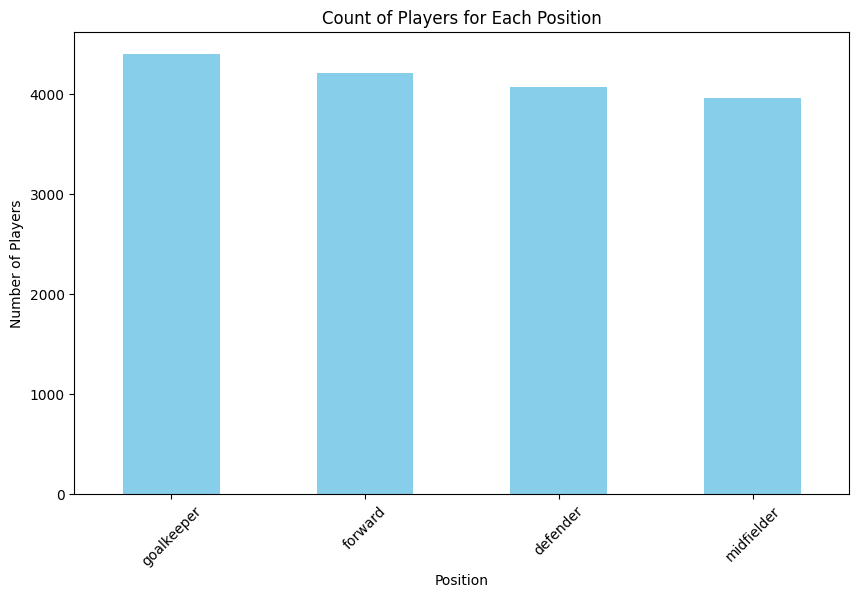

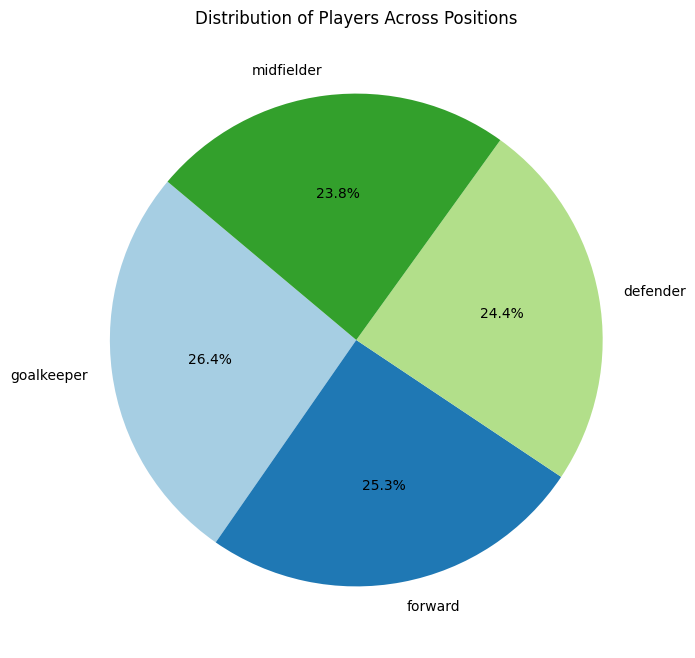

In [450]:
# Bar plot for the count of players for each position
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Players for Each Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

# Pie chart for the distribution of players across positions
plt.figure(figsize=(8, 8))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Players Across Positions')
plt.ylabel('')  # Hide y-label
plt.show()


## Checking for Uniform Distribution

In [43]:
from scipy.stats import chi2_contingency, chi2

position_counts = df['Position'].value_counts()

# Extract observed frequencies from the player counts
observed_frequencies = position_counts.values.tolist()

# Calculate total observed count
total_observed = sum(observed_frequencies)

# Calculate expected frequency assuming uniform distribution
expected_frequency = total_observed / len(df['Position'].unique())

# Create expected frequencies list
expected_frequencies = [expected_frequency] * len(df['Position'].unique())

# Perform Chi-squared test
chi2_stat, p_val, _, _ = chi2_contingency([observed_frequencies, expected_frequencies])

# Degrees of freedom
degrees_of_freedom = len(df['Position'].unique()) - 1

# Critical value for 95% confidence level
critical_value = chi2.ppf(0.95, degrees_of_freedom)

# Compare chi2_statistic to critical value
if chi2_stat > critical_value:
    print("Reject the null hypothesis: The distribution of players across positions is significantly different from uniform.")
else:
    print("Fail to reject the null hypothesis: The distribution of players across positions is not significantly different from uniform.")


Reject the null hypothesis: The distribution of players across positions is significantly different from uniform.


## Plotting the different between original normal distribution and the obtained distribution

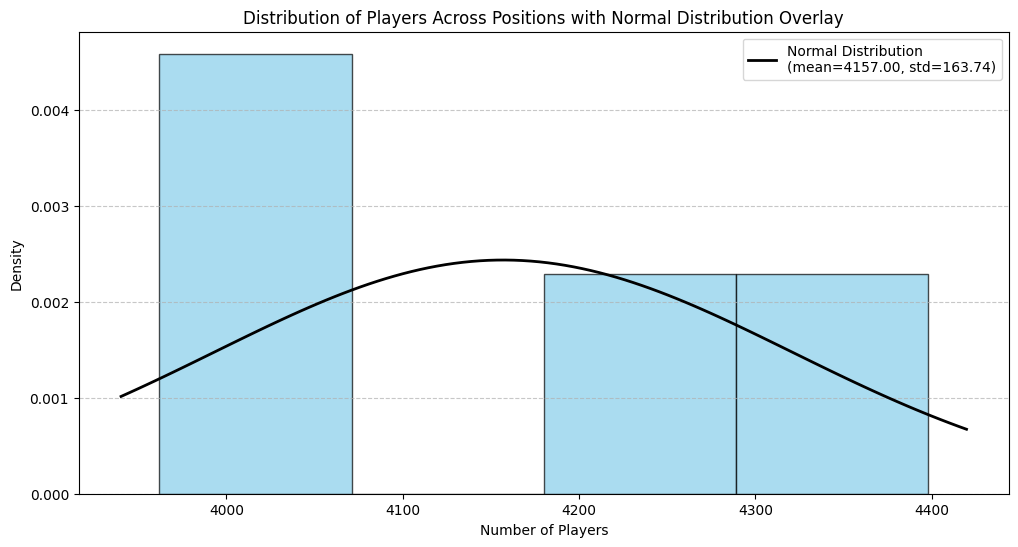

In [452]:
from scipy.stats import norm

# Count the occurrences of each player in the 'Position' column
position_counts = df['Position'].value_counts()

# Plot histogram of player counts across positions
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(position_counts, bins=len(position_counts), color='skyblue', alpha=0.7, edgecolor='black', density=True)

# Fit a normal distribution to the data
mu, std = norm.fit(position_counts)

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n(mean={mu:.2f}, std={std:.2f})')

# Add labels and title
plt.title('Distribution of Players Across Positions with Normal Distribution Overlay')
plt.xlabel('Number of Players')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
